# Testing Luenberger Observer

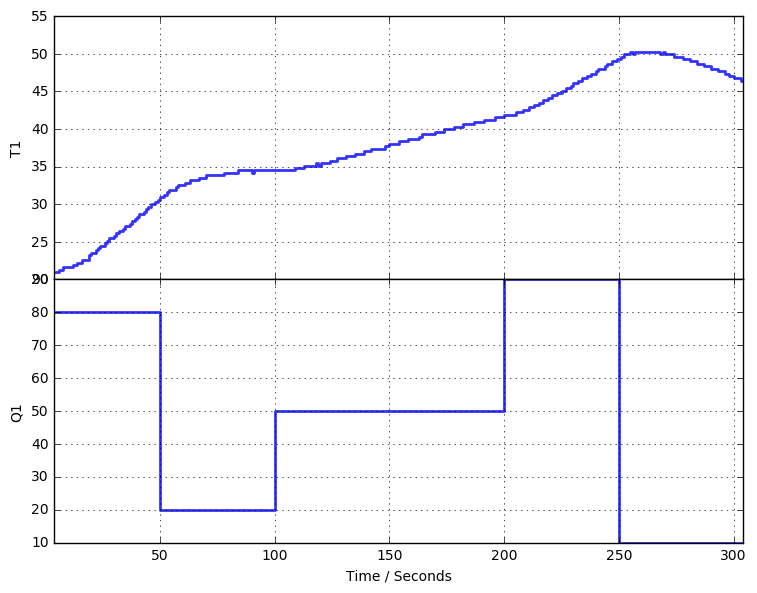

TCLab Model disconnected successfully.


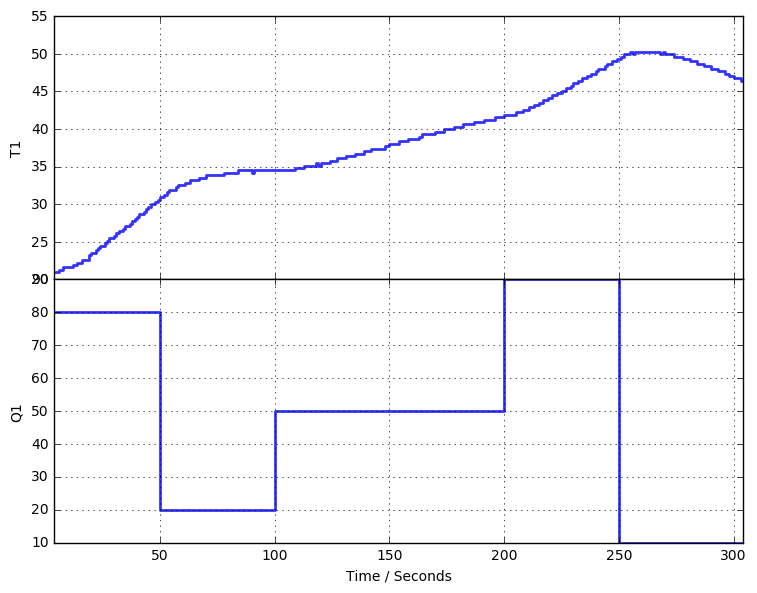

In [2]:
from tclab import TCLab, Historian, Plotter, clock, setup
TCLab = setup(connected=False)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

A = np.matrix([[-0.01764863,0.00804479],[ 0.03706835,-0.03706835]])
B = np.matrix([[(4/7)*1e-2],[0]])
C = np.matrix([[0,1]])

L = np.matrix([[1],[1]])

tfinal = 300

x_est = np.matrix([[20],[20]])

with TCLab() as lab:
    h = Historian([('T1', lambda: lab.T1),('Q1', lab.Q1)])
    p = Plotter(h,tfinal)
    
    for t in clock(tfinal,tol=5):
        
        #error = lab.T1 - np.matmul(C,x_est)
        
        #dx = np.matmul(A,x_est) + B*lab.Q1() +  L*error
        #x_est = x_est + dx
        
        #T_obs = np.matmul(C,x_est)[0]        
        
        if t < 50:
            power = 80
        elif t < 100:
            power = 20
        elif t < 200:
            power = 50
        elif t < 250:
            power = 90
        else:
            power = 10
        
        lab.U1 = power       
        
        p.update(t)

        
df = pd.DataFrame.from_records(h.log, columns=h.columns, index='Time')
df.to_csv('obs_test1')